## Artificial Neuron as Mathematic Notation
In general terms, an input X is multiplied by a weight W and added a bias b producing the net activation. 
<img style="max-width:60%;max-height:60%;" src="https://miro.medium.com/max/1290/1*-JtN9TWuoZMz7z9QKbT85A.png">

We can summarize an artificial neuron with the following mathematical expression:
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right)
$$

## The SigleLayer Perceptron

<p style="text-align: justify;">The Perceptron and its learning algorithm pioneered the research in neurocomputing. the perceptron is an algorithm for supervised learning of binary classifiers [1]. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.<p>
    
<img src="https://www.edureka.co/blog/wp-content/uploads/2017/12/Perceptron-Learning-Algorithm_03.gif">
    
#### References
    
- Freund, Y.; Schapire, R. E. (1999). "Large margin classification using the perceptron algorithm" (PDF). Machine Learning

- Aizerman, M. A.; Braverman, E. M.; Rozonoer, L. I. (1964). "Theoretical foundations of the potential function method in pattern recognition learning". Automation and Remote Control. 25: 821–837.
 
- Mohri, Mehryar and Rostamizadeh, Afshin (2013). Perceptron Mistake Bounds.

## The SingleLayer Perceptron Learning
Learning goes by calculating the prediction of the perceptron:

### Basic Neuron 
$$
\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,
$$

After that, we update the weights and the bias using as:

$$
\hat{w_i} = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
$$
$$
\hat{b} = b + \alpha (y - \hat{y})\,.
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate
        
    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer
    
    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture
    
    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing) 
    
    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

In [2]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(800,2)))
data.head()

,x1,x2
0,0.923605,0.199830
1,0.744596,0.799717
2,0.645855,0.882950
3,0.861900,0.718193
4,0.661324,0.268725


In [3]:
def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)
    
def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)

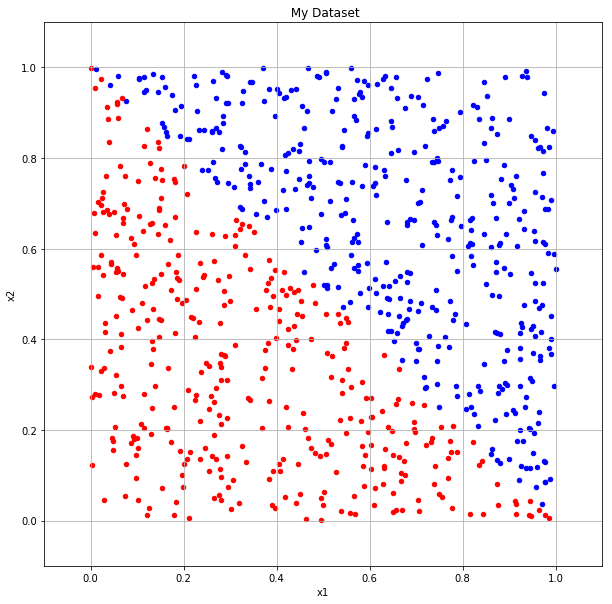

In [4]:
fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())

In [5]:
InitialWeights = [0.2, 0.1]
InitialBias = 0.05
LearningRate = 0.001
SLperceptron = SingleLayerPerceptron(InitialWeights, 
                                     InitialBias,
                                     LearningRate)

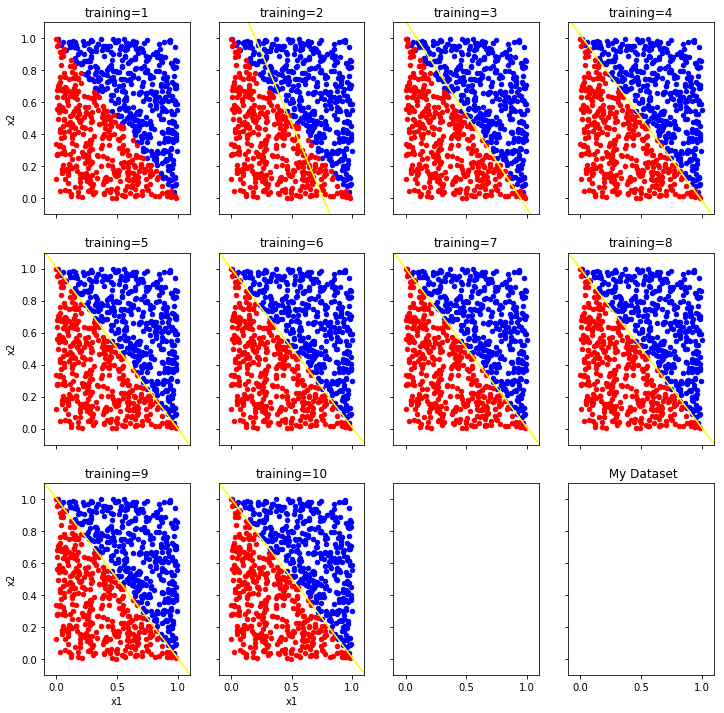

In [6]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()
        
    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)
    
def trainingData(SinglePerceptron, inputs):
    count = 0 
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2], 
                                                  line[2])
    
    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]
    
    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)